In [52]:
participant_id = "P3"

In [53]:
%load_ext autoreload
%autoreload 2
from hireverse.utils.utils import *

video_file_path = os.path.join(BASE_DIR, "data/raw/videos", f"{participant_id}.avi")
print(video_file_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/bassel27/personal_projects/hireverse/data/raw/videos/P3.avi


In [54]:
from hireverse.utils.face_analyzer import FaceAnalyzer
from hireverse.schemas.frame import Frame
import numpy as np
face_analyzer = FaceAnalyzer()
frames = face_analyzer.get_video_frames(participant_id="randomId",video_path= video_file_path, target_fps=20)

In [55]:
filtered_frames: List[Frame] = []
for frame in frames:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj = face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark
        filtered_frames.append(frame)

frames = filtered_frames 

In [56]:
for frame in frames:
    frame.resize(new_width=640)

In [57]:
for frame in frames:
    frame.align_face_with_mediapipe_landmarks()

In [58]:
for frame in frames:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)
        x, y, w, h = frame.face
        frame.crop_frame(x, y, x + w, y+h)

In [59]:
import cv2

for frame in frames:
    frame.image =  cv2.cvtColor(frame.image, cv2.COLOR_BGR2GRAY)

In [60]:
# Step 1: Scale
frame.image = frame.image.astype('float32') / 255.0

# Step 2: CHECK invalid values (before clipping)
invalid_high = np.sum(frame.image > 1.0)
invalid_low = np.sum(frame.image < 0.0)
total_pixels = np.prod(frame.image.shape)

print(f"Invalid high (>1.0): {(invalid_high/total_pixels)*100:.6f}%")
print(f"Invalid low (<0.0): {(invalid_low/total_pixels)*100:.6f}%")

Invalid high (>1.0): 0.000000%
Invalid low (<0.0): 0.000000%


In [61]:
for frame in frames:
    frame.image = np.clip(frame.image.astype('float32') / 255.0, 0.0, 1.0)

In [62]:
for frame in frames:
    frame.resize(new_width=640, new_height=640)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


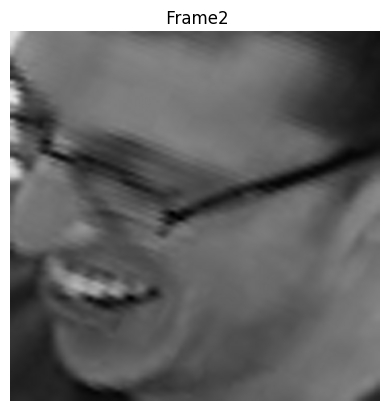

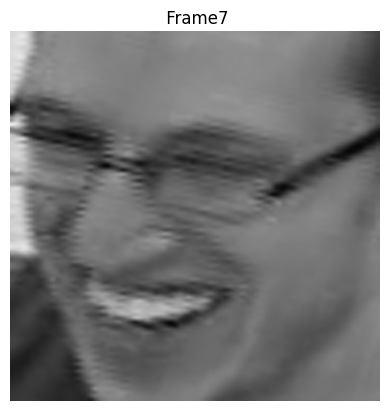

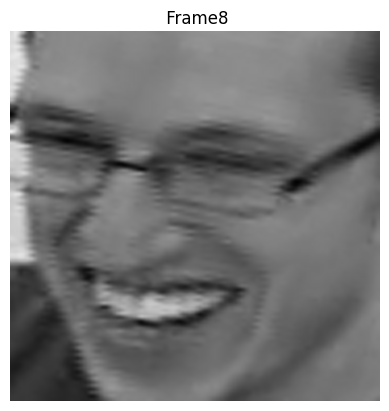

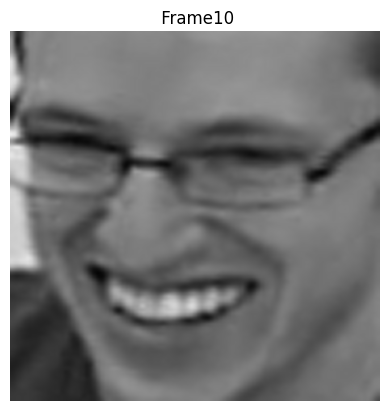

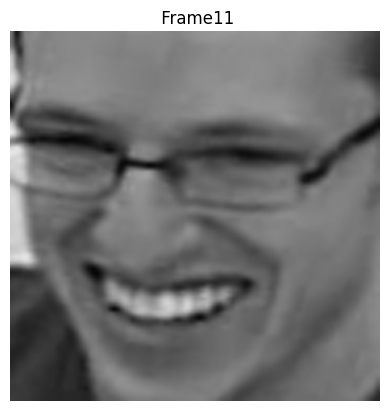

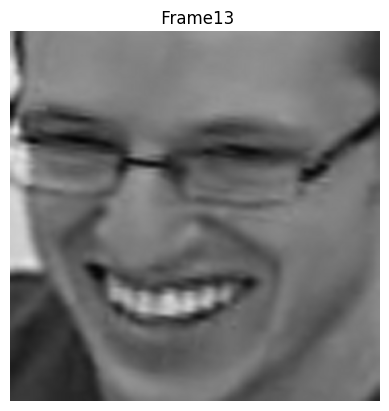

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


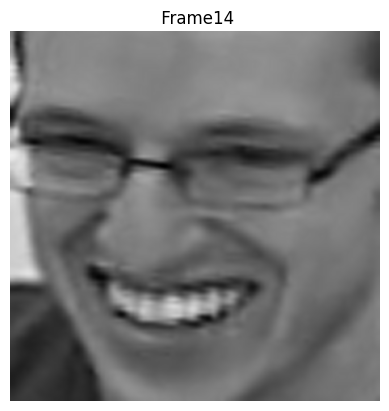

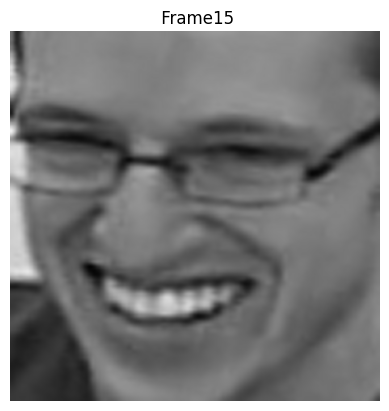

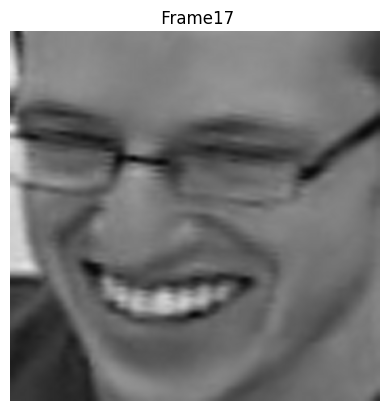

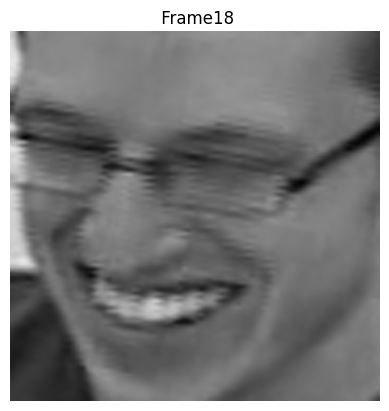

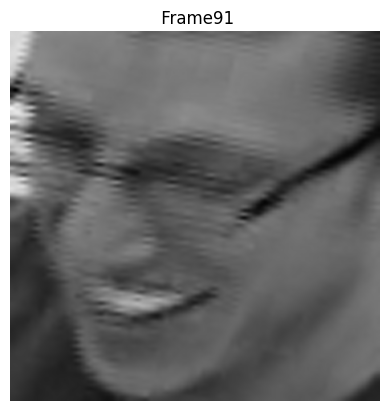

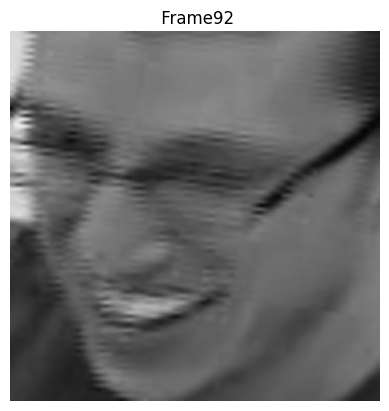

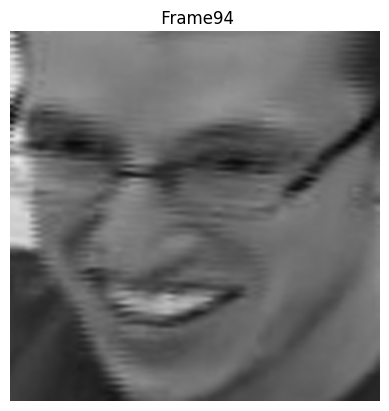

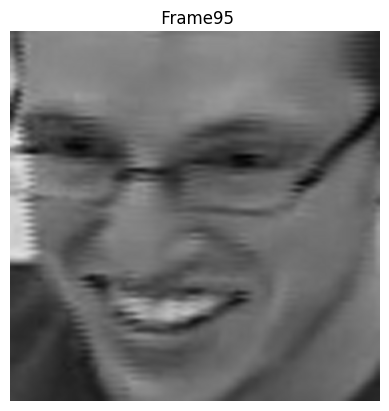

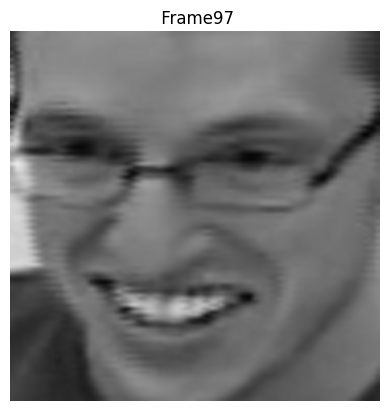

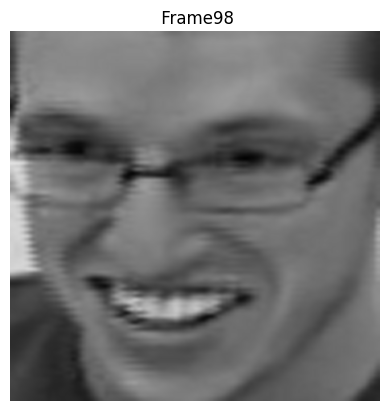

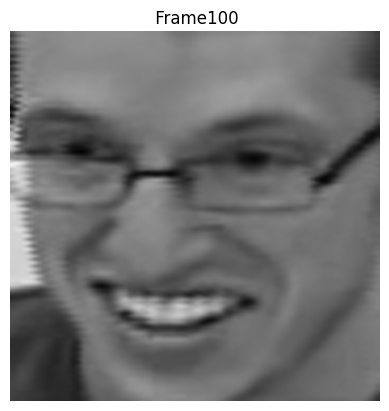

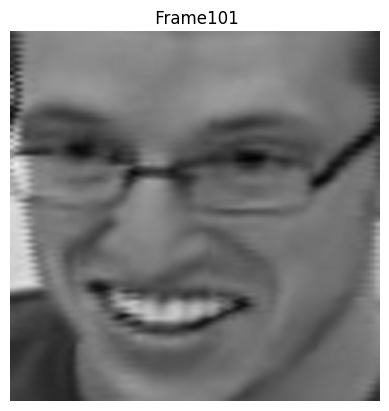

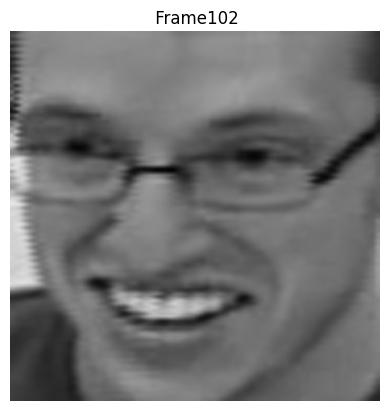

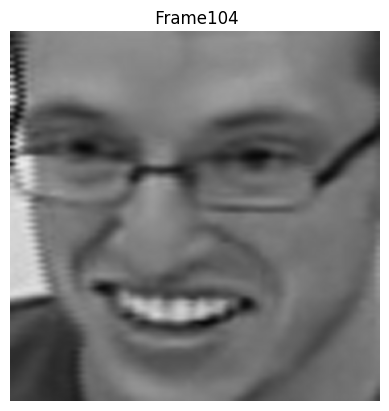

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


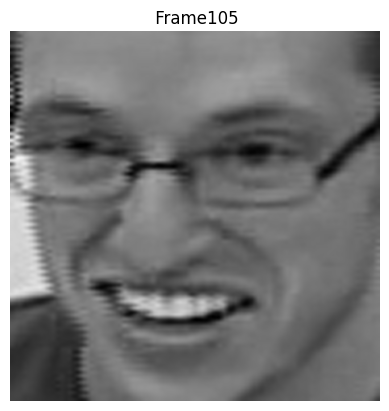

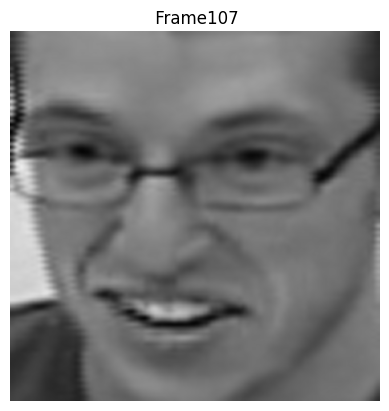

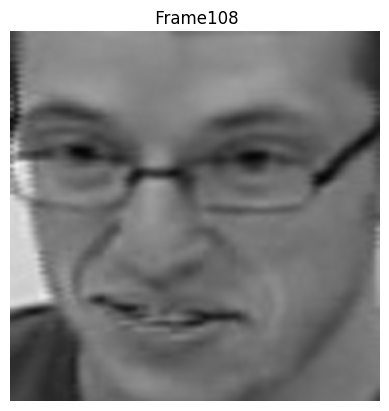

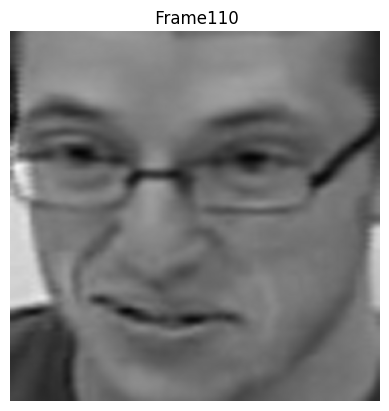

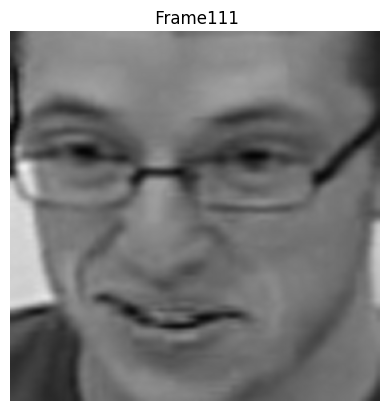

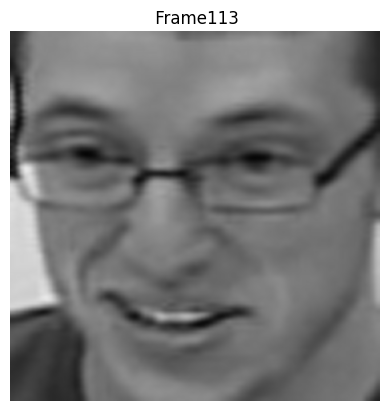

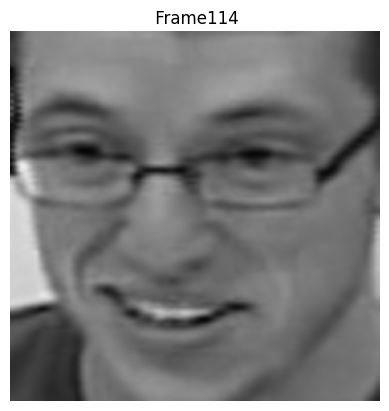

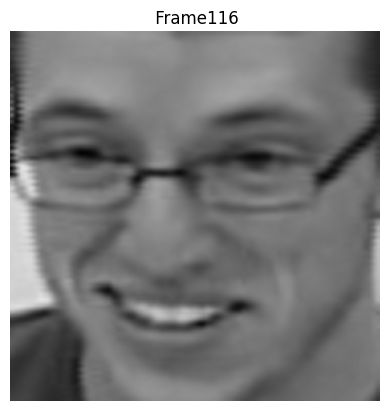

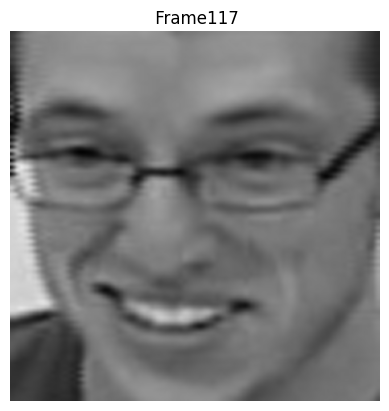

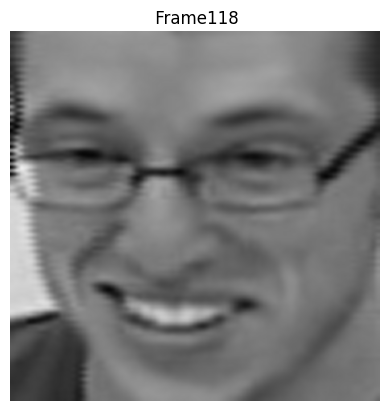

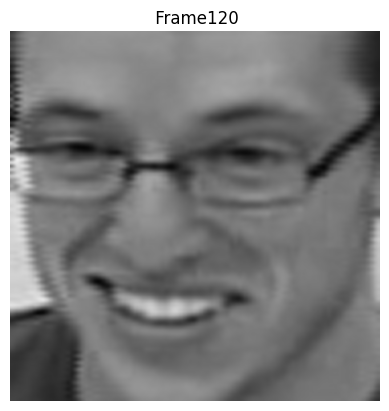

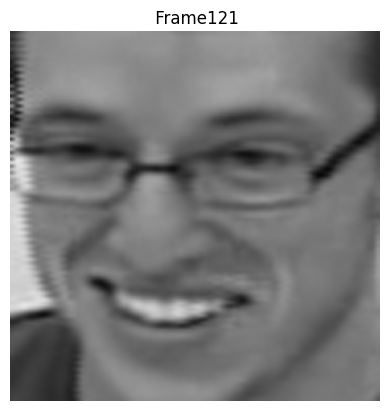

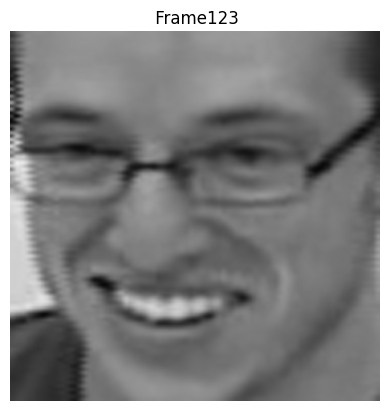

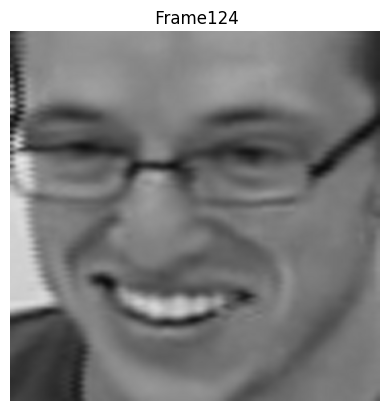

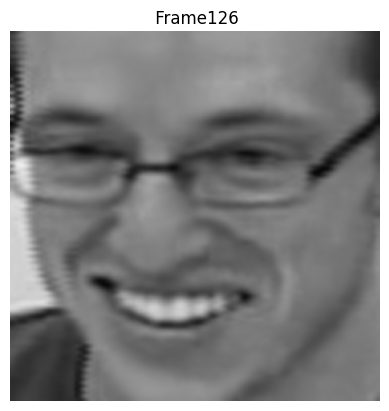

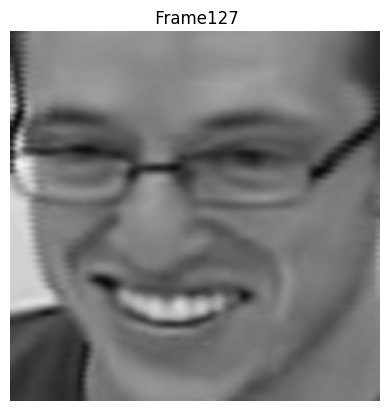

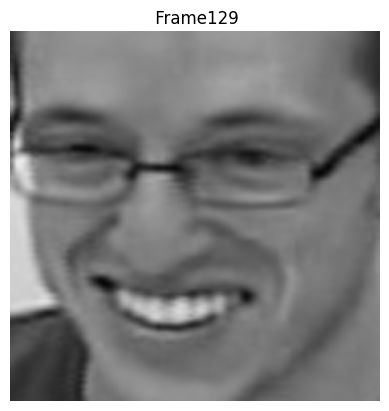

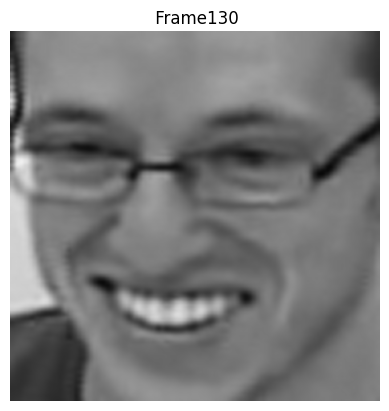

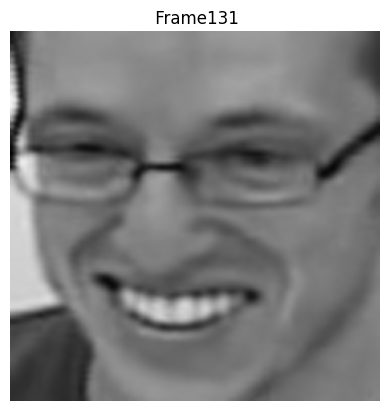

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


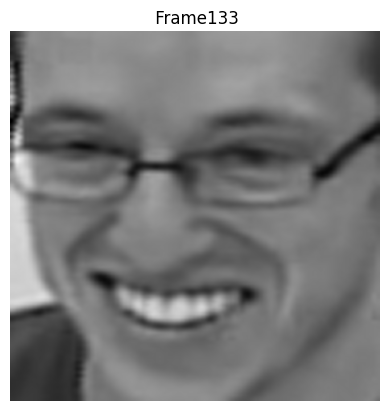

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


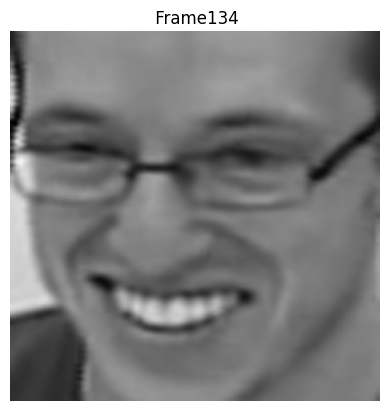

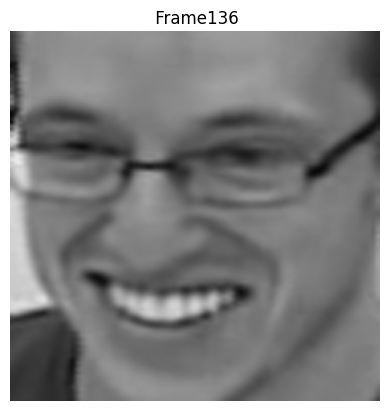

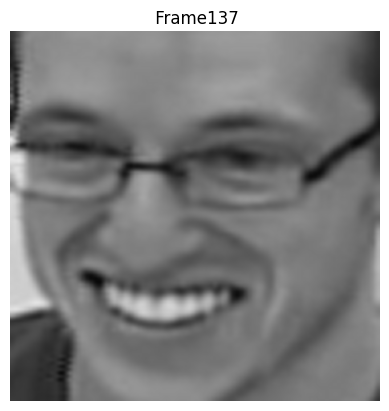

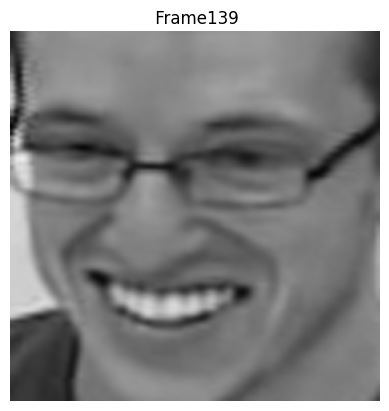

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


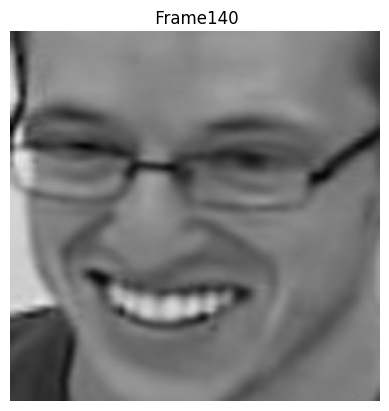

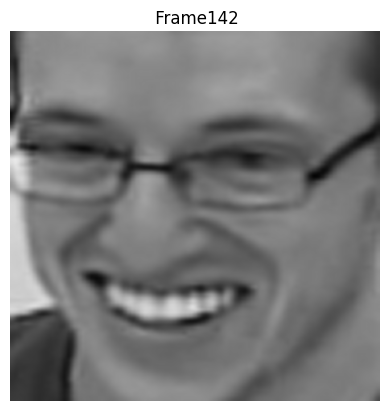

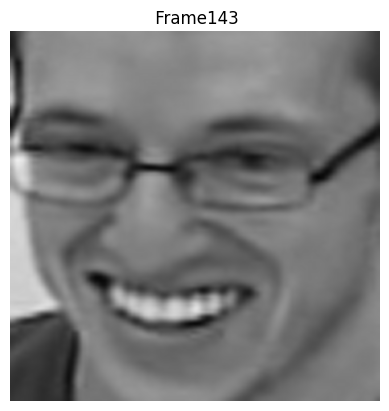

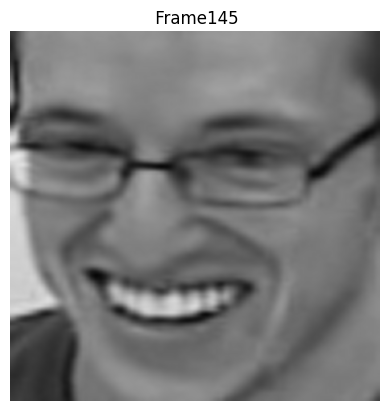

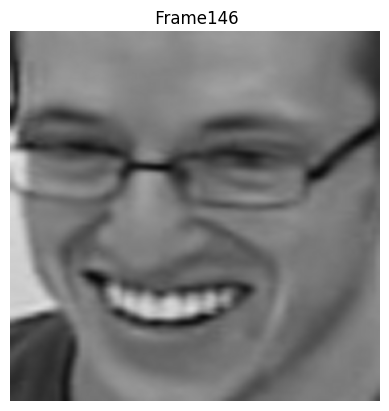

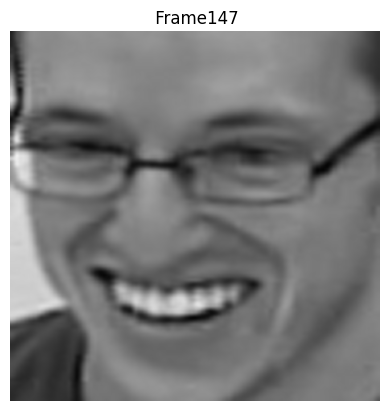

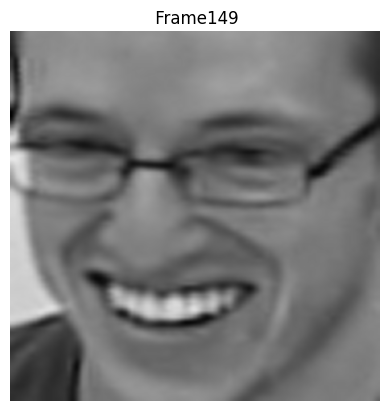

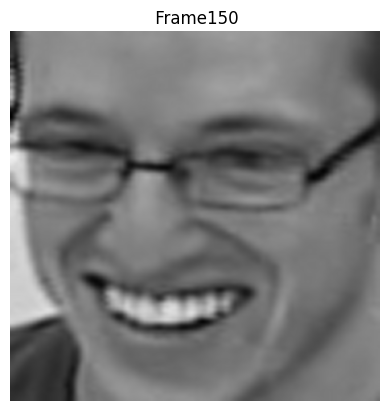

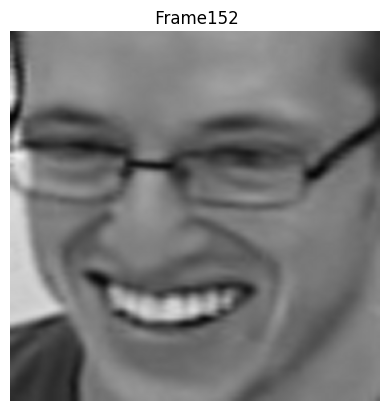

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


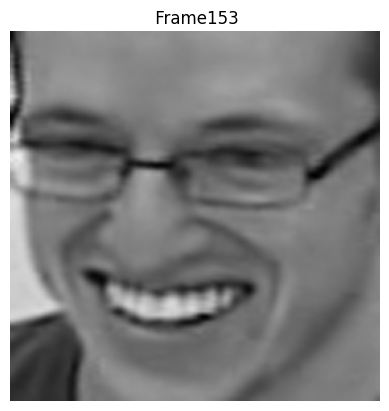

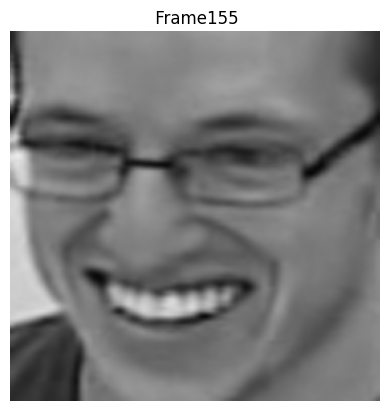

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


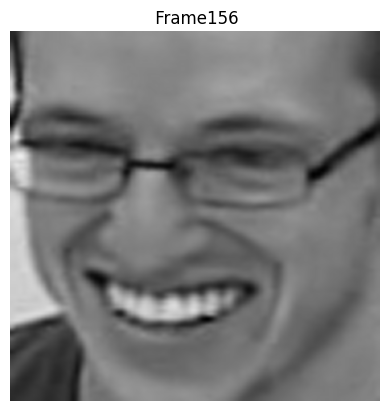

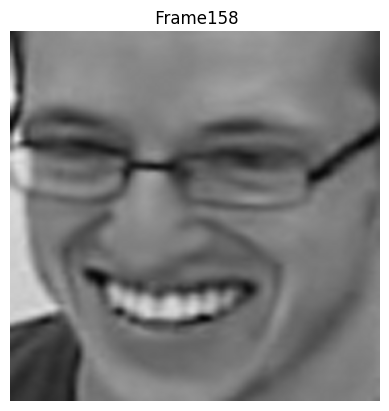

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


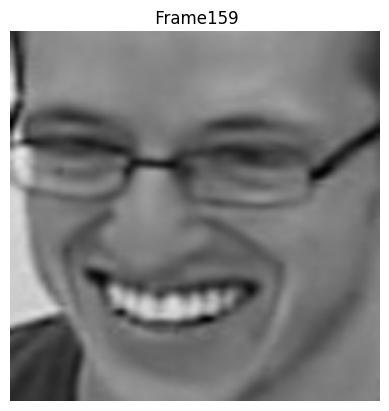

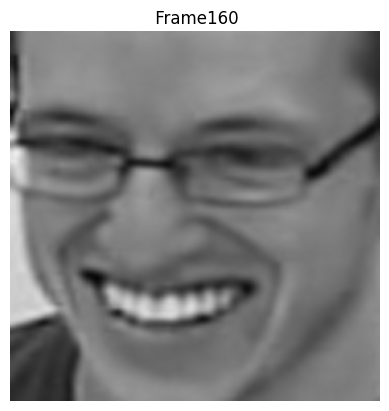

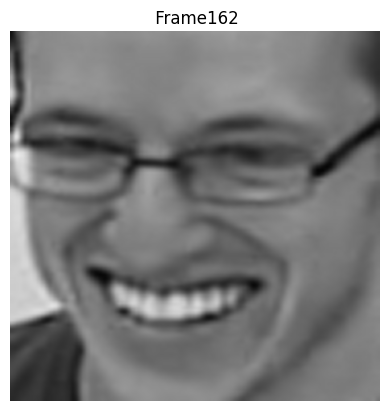

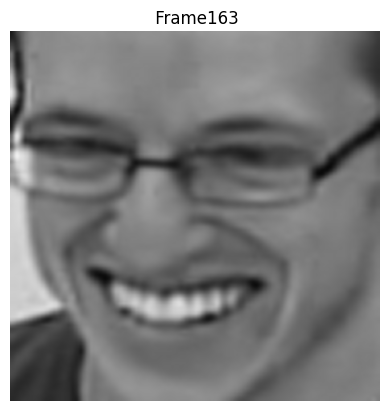

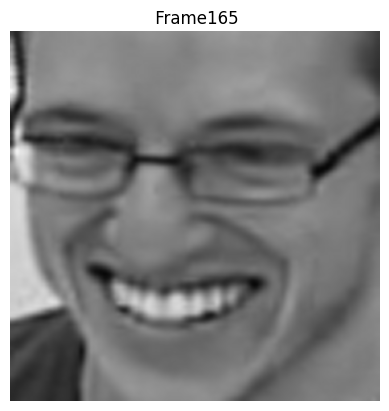

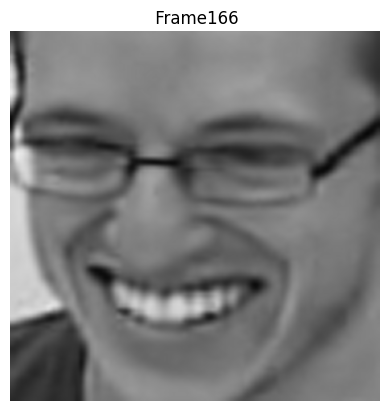

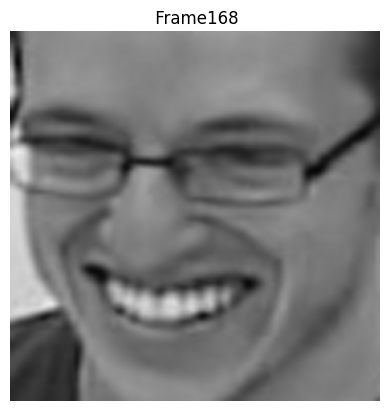

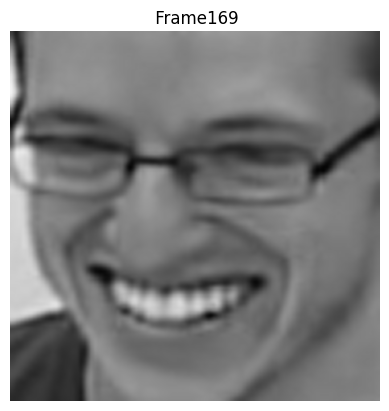

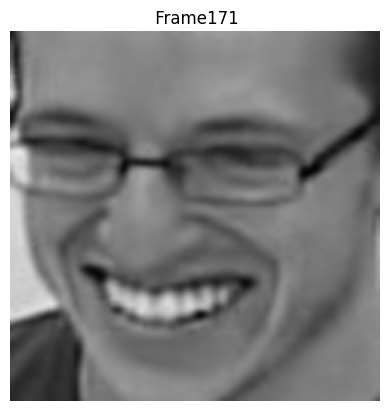

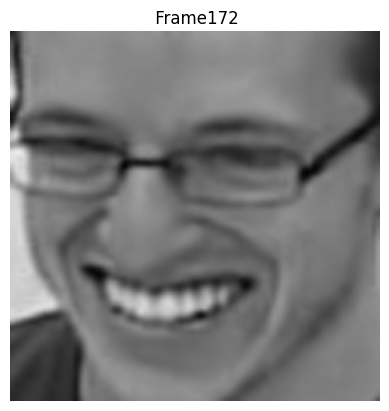

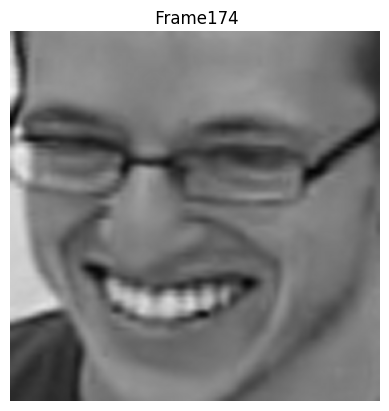

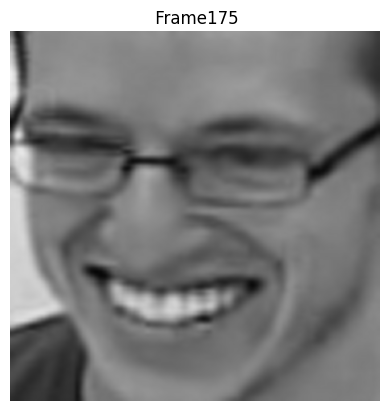

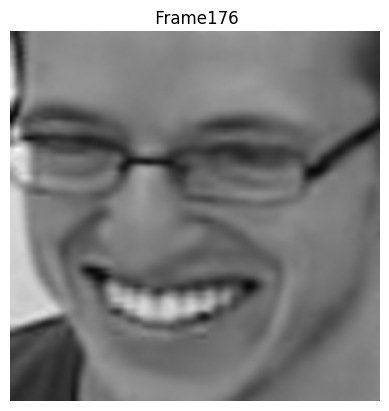

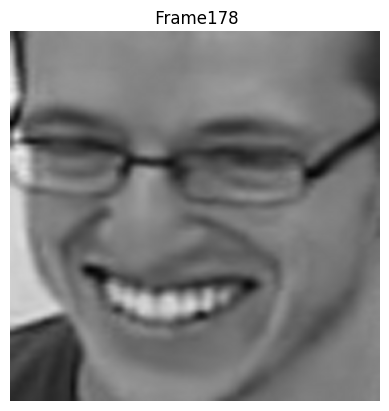

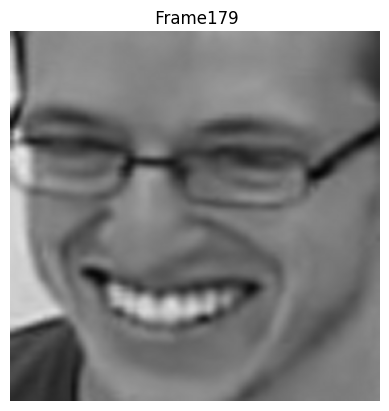

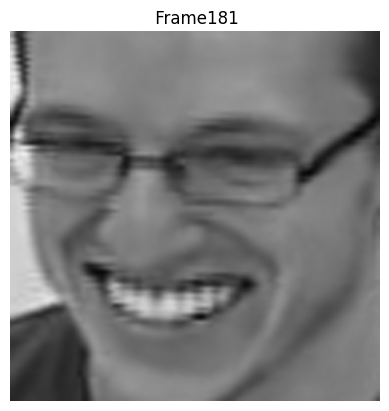

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


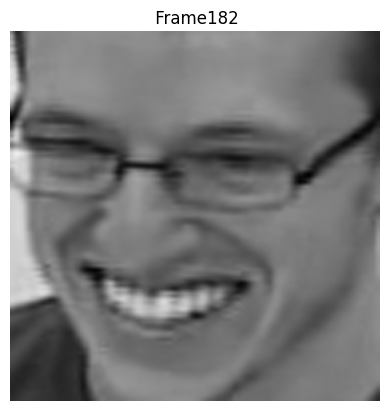

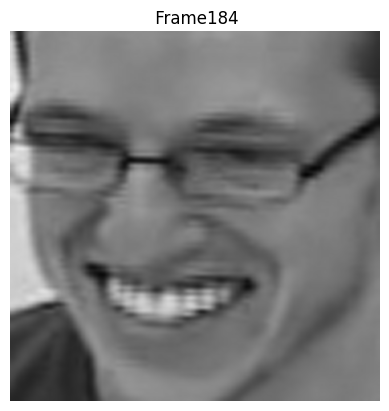

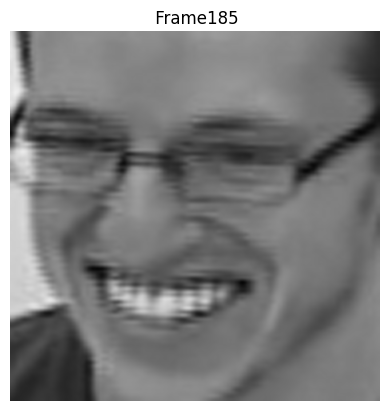

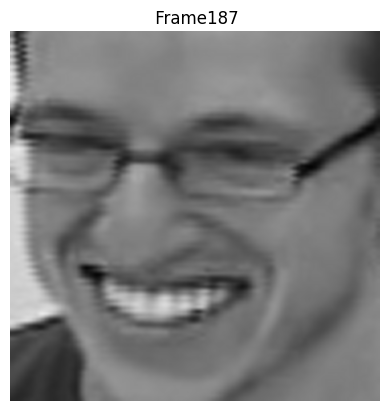

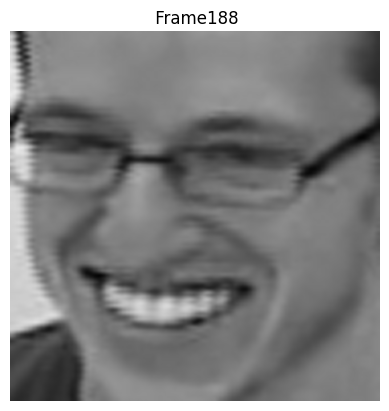

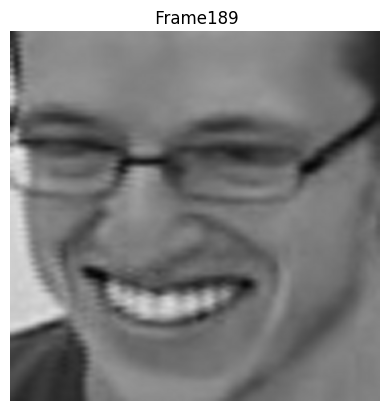

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


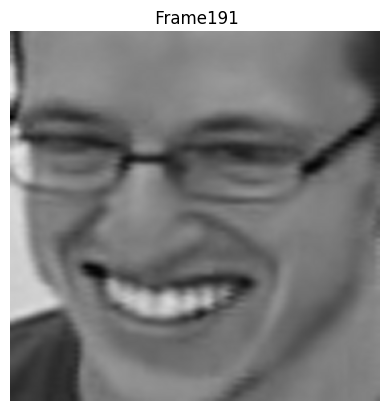

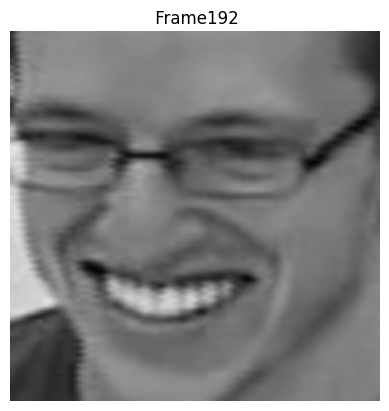

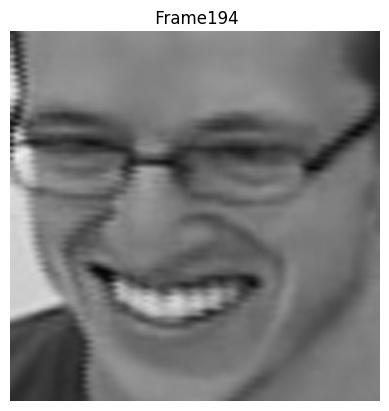

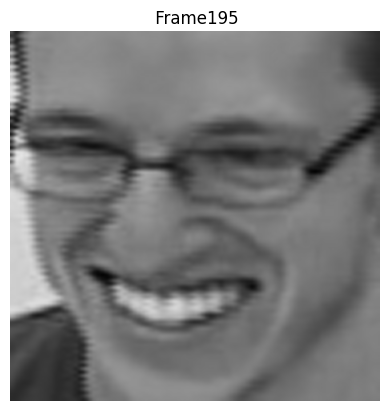

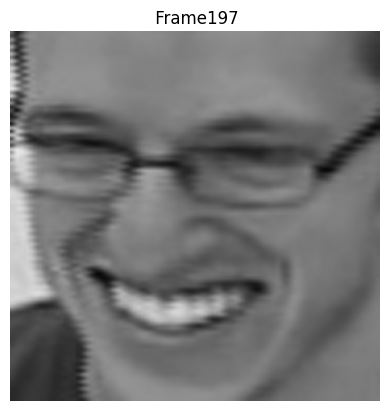

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


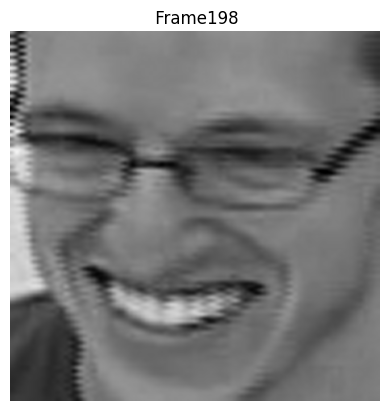

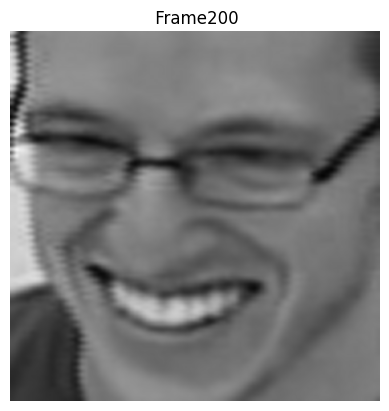

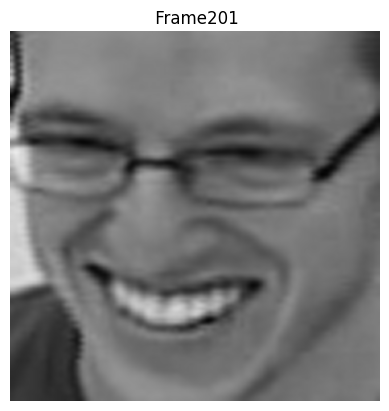

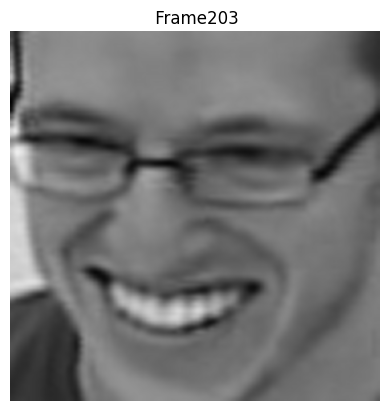

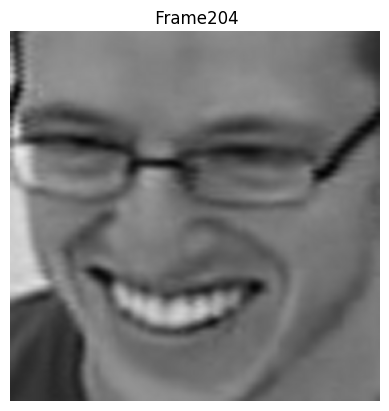

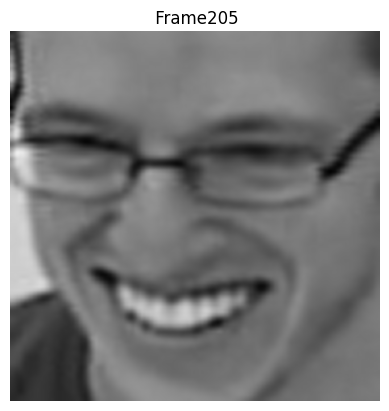

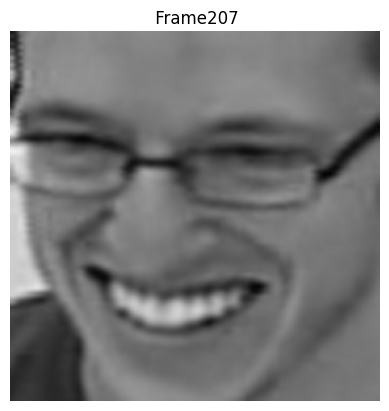

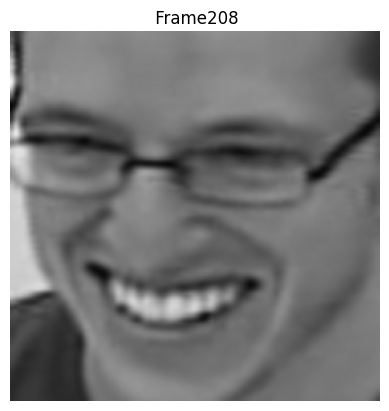

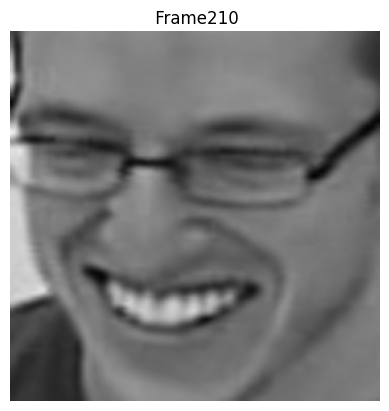

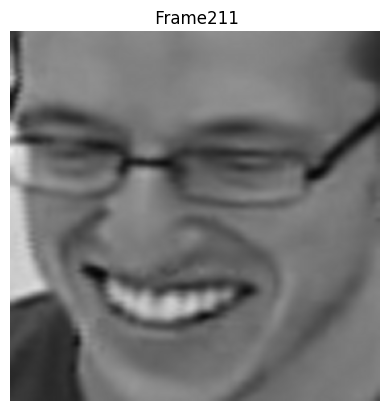

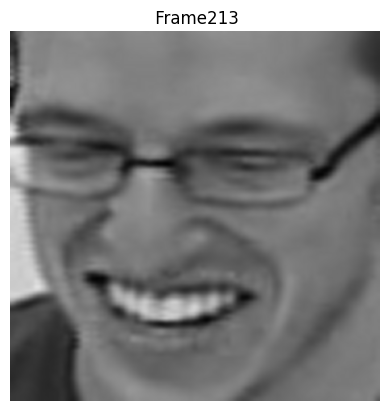

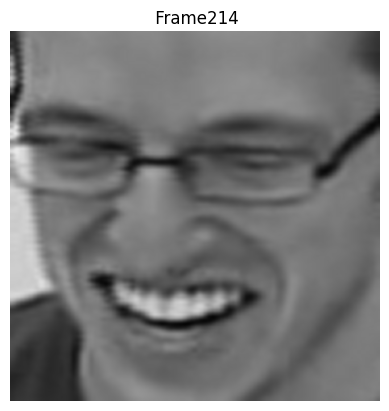

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


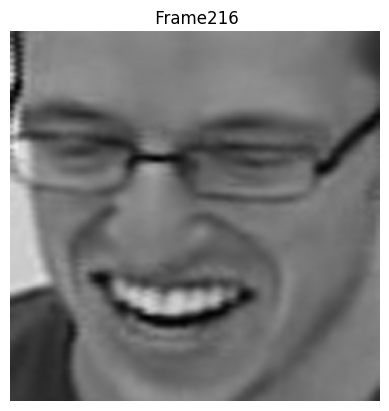

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


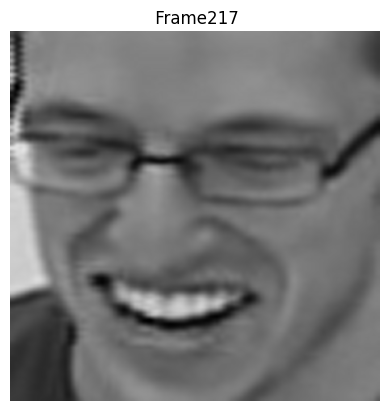

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


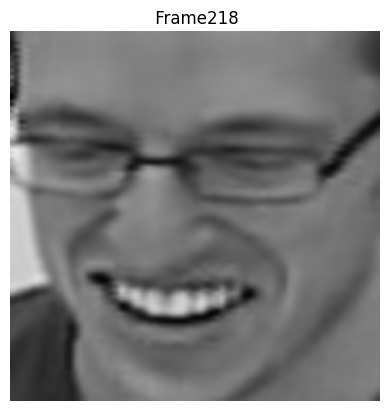

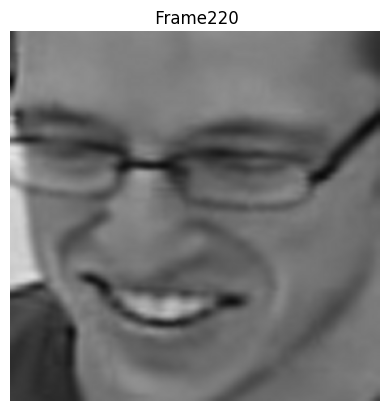

In [ ]:
# import numpy as np


# for frame in frames[:100]:
#     frame.reset_drawable_image()
#     # frame.draw_face_border()
#     # frame.draw_facial_landmarks()
#     # if frame.facial_landmarks:
#     #     frame.draw_circle_at_facial_landmark(frame.facial_landmarks[10], frame.facial_landmarks[152])
#     frame.display()